# Helicopter Prison Escapes
### *Basic data analysis and visualization*

This small, guided project is the first one, that I am doing as part of my DataQuest "Data Scientist in Python" learning path. It is about prison escapes where a helicopter has been used to assist the prisoner with escaping (or attempting to escape). We will investigate two things. In which single years have the most attempts occured (and how many) and in which country/countries they have occurred.

We begin by importing some helper functions that have been predefined by DataQuest. To be able to use them outside of their site, I have downloaded and copied them and made a python module out of them which is available alongside this Jupyter Notebook.

In [1]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)   # Helper function

Let's print the first three rows to have a look at it:

In [3]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 1975 action movie Breakout, wh

## Modyfying the Data

### Removing the last column

We want to get rid of the last column of the data (the description of what happened in each case), since this takes up almost all the space of the table. We do this by for each row in the data replacing it with the same row without the last element.

In [15]:
%%capture
# (The above line with the capture command just discards the output of this cell.)

"""
This technical box/section explains how the next code block became as it is. If interested: read it, else: skip ahead.

So, Dataquest suggested that the below code block should be

index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

but I wanted to try with

for row in data:
    row = row[:-1]
    
instead, which showed no effect at all.

Chat GPT explained that

"When you use row[:] = row[:-1], you are performing what is known as a
slice assignment. The row[:] syntax creates a new list that is a copy of the 
original row list. This is crucial because it ensures that you are modifying 
the elements of the list in place without changing the reference to the list 
itself.

If you were to use row = row[:-1] without the [:], you would be creating a new 
list and assigning it to the variable row. However, this wouldn't modify the 
original list inside the data list. It would only change the local variable 
row to reference the new list.

By using row[ : ] = row[:-1], you are saying "replace all elements in the existing list row with the elements from row[:-1]." This ensures that you are modifying the original list inside the data list, not creating a new list or changing the reference.

In summary, using row[:] in the context of slice assignment ensures that you 
are modifying the original list in place, not creating a new list or changing 
the reference to the list."

Hence the code block became as shown below.
"""

In [5]:
for row in data:
    row[:] = row[:-1]

In [6]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']


### Extracting the year from the date cell by use of helper function

We use the helper function fetch_year() inside a loop to replace the date with only the year in every row.

In [7]:
for row in data:
    row[0] = fetch_year(row[0])

print (data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


### Creating a list of lists containing number of attempts per year

These bits of code in the first of the below code boxes are provided by DataQuest to be copy/pasted. They find the first and the last year respectively with registered helicopter assisted prison break attemps and then generates a list of all years from the earliest to the latest (inclusive) of those years.

In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

years = []
for year in range(min_year, max_year + 1):
    years.append(year)

We then create a list of lists, calling it attempts_per_year, of the form [\<year>, 0] containing the years generated above.

In [9]:
attempts_per_year = []

for year in years:
    attempts_per_year.append([year, 0])

print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


We now iterate over our modified version of the original data list, data, and for each attempt that occured (each row), we add one to the counter element of that year in the attemps_per_year list.

In [10]:
for row in data:
    year = row[0]
    
    for year_attempt in attempts_per_year:
        if year_attempt[0] == year:
            year_attempt[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


## Creating a barplot to visualize distribution of attempts by year

DataQuest provides the following code to do this.

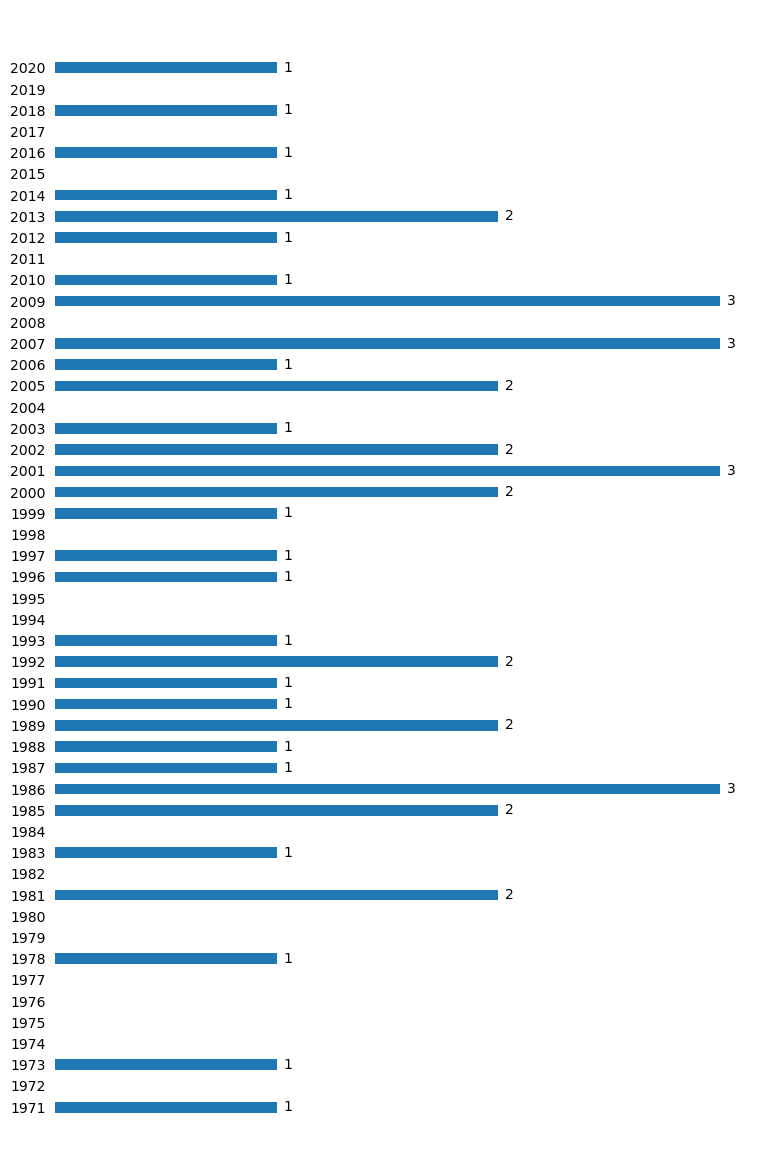

In [11]:
%matplotlib inline
barplot(attempts_per_year)

## Partial conclusion: Attempts per year

As we can see from the barplot the most attempts in a single year, 3, occurred in the years 1986, 2001, 2007 and 2009.

## Counting the number of attempts in each country

DataQuest created a variable called df, which can be seen in the [helper.py](https://app.dataquest.io/jupyter/edit/notebook/helper.py) (link might not work anymore - if that is the case, you can look in the helper.py file in the repository where you found this Notebook), to assist counting using another teqnique covered in detail later in the learning path. This enables us to count the number of times that a given value (country) occurs in our data with the following command:

In [12]:
countries_frequency = df["Country"].value_counts()

Using the helperfunction (also provided by DataQuest), print_pretty_table(), we can display the results of the counting:

In [13]:
print_pretty_table(countries_frequency)

## Final partial conclusion: Attempts by Country

From the above table we clearly see that the most attemps have been made in France with 15 attempts while only 8 attempts have been made in the US taking the second place.